In [51]:
import keras as kr
from keras.datasets import mnist
from keras.models import Sequential # create neural network
from keras.layers import (
    Dense, # deep nn full connected layer
    Dropout, 
    Flatten, 
    MaxPooling2D, 
    Conv2D)
from keras.utils.multi_gpu_utils import multi_gpu_model

import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [53]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [54]:
# X_train = X_train.reshape(600000, 28,28,1).astype('float32')
# X_test = X_test.reshape(100000, 28,28,1).astype('float32')
# new update maybe already reshaped

In [55]:
X_train[0].shape

(28, 28)

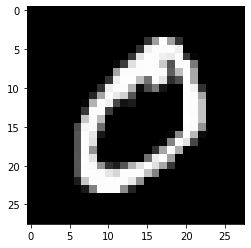

In [56]:
plt.imshow(X_train[1].reshape(28,28), cmap='gist_gray')

In [57]:
X_train[1].max()

255

In [58]:
X_train[0].min()

0

# normalize for good computation

In [59]:
X_train = X_train / 255
X_test = X_test / 255

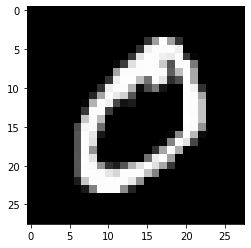

In [60]:
plt.imshow(X_train[1].reshape(28,28), cmap='gist_gray')

In [61]:
X_train[1].max()

1.0

In [62]:
X_train[1].min()

0.0

In [63]:
y_train[1] # answer is number zero

0

# labelize, tokenize

In [64]:
import tensorflow.keras.utils as utils

In [65]:
y_train[1] # number zero

0

In [66]:

n_classes = 10
y_train = utils.to_categorical(y_train, n_classes)
y_test = utils.to_categorical(y_test, n_classes)

In [67]:
y_train[1] # number zero is locate at first index

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [93]:
model = Sequential()
# model.add(Conv2D(32, kernel_size=(3,3), activation='relu', ))
# model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(n_classes, activation='softmax')) # n_neural = 10 (0->9)

In [94]:
multi_gpu_model(model, ) # no a gpu in this machine, only /cpu:0 only one.

TypeError: multi_gpu_model() missing 1 required positional argument: 'gpus'

In [96]:
model.compile(loss='catergorical_crossentropy',
            optimizer='adam',
             metrics=['accuracy'])

In [97]:
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1,
         validation_data=(X_test, y_test))

Epoch 1/5


ValueError: in user code:

    File "/home/liberio/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/liberio/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_5" (type Sequential).
    
    Input 0 of layer "max_pooling2d_4" is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: (None, 28, 28)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 28, 28), dtype=float32)
      • training=True
      • mask=None
